In [18]:
#The goal of this project is to accurately classify wage earners above and below the 50k mark using census data.

import pandas as pd

df = pd.read_csv('C:/Users/ncole/Downloads/adult.data')
first_row = df.columns
columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education Years', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours per Week', 'Native Country', 'Income']
rename_dict = {}
for index, val in enumerate(columns):
    rename_dict[first_row[index]] = val
df.rename(columns = rename_dict, inplace = True)
df['Income'] = df['Income'].apply(lambda x: 0 if '<=50K' in x else 1)
df.shape

(32560, 15)

In [2]:
#Null data points are not a concern with this dataset
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32560 non-null  int64 
 1   Workclass        32560 non-null  object
 2   fnlwgt           32560 non-null  int64 
 3   Education        32560 non-null  object
 4   Education Years  32560 non-null  int64 
 5   Marital Status   32560 non-null  object
 6   Occupation       32560 non-null  object
 7   Relationship     32560 non-null  object
 8   Race             32560 non-null  object
 9   Sex              32560 non-null  object
 10  Capital-gain     32560 non-null  int64 
 11  Capital-loss     32560 non-null  int64 
 12  Hours per Week   32560 non-null  int64 
 13  Native Country   32560 non-null  object
 14  Income           32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [3]:
#Identify important early quantitative factors
import seaborn as sns
df.corr()['Income'].sort_values(ascending = False)
#For further visualization use this code below
#sns.heatmap(df.corr(), annot = True)

Income             1.000000
Education Years    0.335182
Age                0.234039
Hours per Week     0.229690
Capital-gain       0.223333
Capital-loss       0.150523
fnlwgt            -0.009481
Name: Income, dtype: float64

<AxesSubplot:>

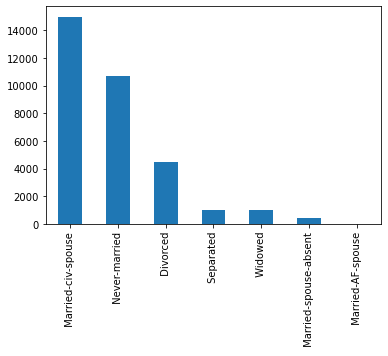

In [4]:
df['Marital Status'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Marital Status'>

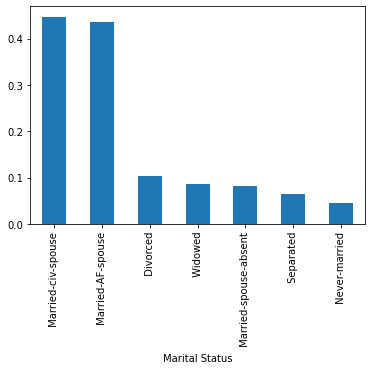

In [5]:
#This analysis reveals that likelihood of making more than 50k varies significantly by 
df.groupby('Marital Status')['Income'].mean().sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='Capital-gain'>

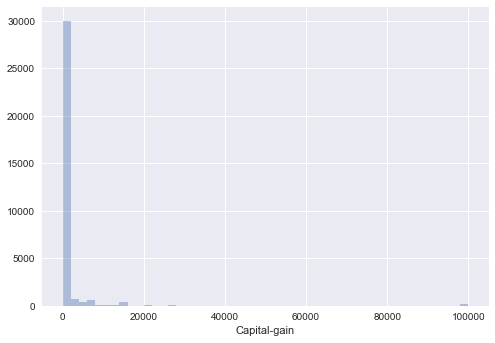

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#booleans = df.applymap(lambda x: isinstance(x, (int, float)))
#print(set(booleans['Capital-gain']))
sns.set_style()
sns.distplot(df['Capital-gain'],bins = 50, kde = False)

<AxesSubplot:xlabel='Occupation'>

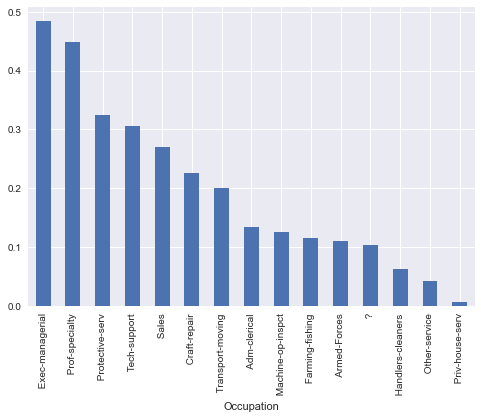

In [7]:
#Clearly a significant variance in income probability by occupation
#df['Occupation'].value_counts().plot(kind = 'bar')
df.groupby('Occupation')['Income'].mean().sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='Native Country'>

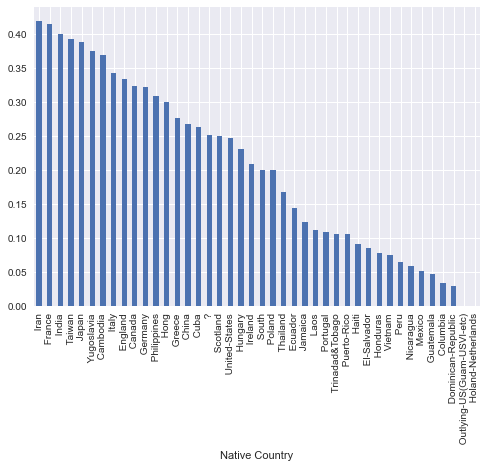

In [8]:
#Workclass is clearly an important variable
df.groupby('Native Country')['Income'].mean().sort_values(ascending = False).plot(kind = 'bar')
#df.groupby('Workclass')['Income'].mean().sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='Sex'>

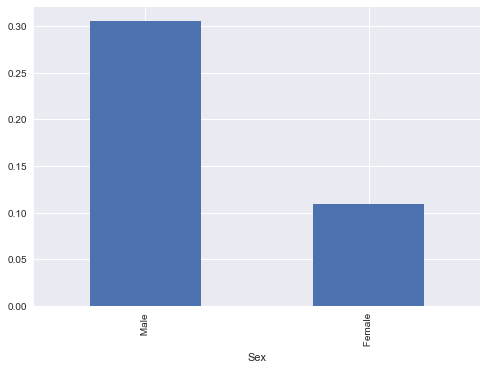

In [9]:
#Substantial income difference across sexes
df.groupby('Sex')['Income'].mean().sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='Race'>

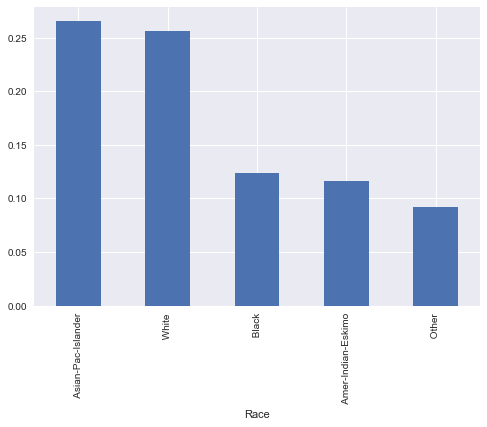

In [10]:
#Substantial Variance by Race as well
df.groupby('Race')['Income'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [11]:
#Want to create dummy variable columns along important columns to train classifier
import numpy as np
final = df.select_dtypes(include=np.number)

marital = pd.get_dummies(df['Marital Status'], prefix = "Marriage_Status").iloc[:,1:]
race = pd.get_dummies(df['Race'], prefix = 'race').iloc[:,1:]
sex = pd.get_dummies(df['Sex'], prefix = 'sex').iloc[:, 1:]
occupation = pd.get_dummies(df['Occupation'], prefix = 'job').iloc[:, 1:]
#country = pd.get_dummies(df['Native Country'], prefix = 'country').iloc[:, 1:]
#country.drop('country_?', axis = 1, inplace = True)
workclass = pd.get_dummies(df['Workclass'], prefix = 'class').iloc[:, 1:]



final = pd.concat([final, race, sex, marital, occupation, workclass], axis = 1)

final.drop('fnlwgt', inplace = True, axis = 1)
final.head()

,Age,Education Years,Capital-gain,Capital-loss,Hours per Week,Income,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,...,job_ Tech-support,job_ Transport-moving,class_ Federal-gov,class_ Local-gov,class_ Never-worked,class_ Private,class_ Self-emp-inc,class_ Self-emp-not-inc,class_ State-gov,class_ Without-pay
0,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37,14,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = final.drop('Income', axis = 1)
y = final['Income']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)


In [13]:
#scaler = MinMaxScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

model = GaussianNB()
model.fit(x_train, y_train)
predictions = model.predict(x_test)




In [14]:
from sklearn import metrics 
print(metrics.accuracy_score(y_test, predictions)) 


0.8336404586404587


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

neighbors = KNeighborsClassifier()
neighbors.fit(x_train, y_train)
predic = neighbors.predict(x_test)
print(metrics.accuracy_score(y_test, predic))

0.8204340704340705


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear','poly','rbf'], 'gamma':['scale','auto']}
clf = GridSearchCV(SVC(), param_grid, verbose = 3)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] gamma=scale, kernel=linear ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... gamma=scale, kernel=linear, score=0.848, total=  22.4s
[CV] gamma=scale, kernel=linear ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.3s remaining:    0.0s


[CV] .......... gamma=scale, kernel=linear, score=0.852, total=  23.6s
[CV] gamma=scale, kernel=linear ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.8s remaining:    0.0s


[CV] .......... gamma=scale, kernel=linear, score=0.844, total=  23.5s
[CV] gamma=scale, kernel=linear ......................................
[CV] .......... gamma=scale, kernel=linear, score=0.850, total=  25.4s
[CV] gamma=scale, kernel=linear ......................................
[CV] .......... gamma=scale, kernel=linear, score=0.847, total=  26.8s
[CV] gamma=scale, kernel=poly ........................................
[CV] ............ gamma=scale, kernel=poly, score=0.840, total=  26.0s
[CV] gamma=scale, kernel=poly ........................................
[CV] ............ gamma=scale, kernel=poly, score=0.851, total=  24.9s
[CV] gamma=scale, kernel=poly ........................................
[CV] ............ gamma=scale, kernel=poly, score=0.837, total=  27.7s
[CV] gamma=scale, kernel=poly ........................................
[CV] ............ gamma=scale, kernel=poly, score=0.848, total=  28.2s
[CV] gamma=scale, kernel=poly ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 15.4min finished


NameError: name 'results' is not defined

MAE: 0.848996723996724


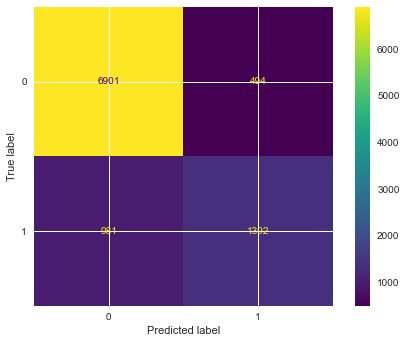

In [44]:
from sklearn.metrics import plot_confusion_matrix
print('MAE:', metrics.accuracy_score(y_test, predictions))
plot_confusion_matrix(clf, x_test, y_test)



In [49]:
#Deep learning model attempt
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode= 'min',verbose = 1, patience = 25)
model = Sequential()
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, validation_data = (x_test, y_test), callbacks = [early_stop], batch_size = 128, epochs = 200)

Epoch 1/200
179/179 [==============================] - 5s 20ms/step - loss: 0.5970 - accuracy: 0.8005 - val_loss: 0.4945 - val_accuracy: 0.7777
Epoch 2/200
179/179 [==============================] - 3s 17ms/step - loss: 0.4141 - accuracy: 0.8262 - val_loss: 0.4026 - val_accuracy: 0.8351
Epoch 3/200
179/179 [==============================] - 3s 15ms/step - loss: 0.5173 - accuracy: 0.8162 - val_loss: 0.4015 - val_accuracy: 0.8251
Epoch 4/200
179/179 [==============================] - 3s 16ms/step - loss: 0.3889 - accuracy: 0.8327 - val_loss: 0.4588 - val_accuracy: 0.8388
Epoch 5/200
179/179 [==============================] - 3s 20ms/step - loss: 0.3738 - accuracy: 0.8459 - val_loss: 0.3600 - val_accuracy: 0.8458
Epoch 6/200
179/179 [==============================] - 3s 16ms/step - loss: 0.3525 - accuracy: 0.8437 - val_loss: 0.3694 - val_accuracy: 0.8467
Epoch 7/200
179/179 [==============================] - 3s 16ms/step - loss: 0.3643 - accuracy: 0.8458 - val_loss: 0.3639 - val_accuracy:

306/306 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.8481


[0.43029919266700745, 0.8480753302574158]

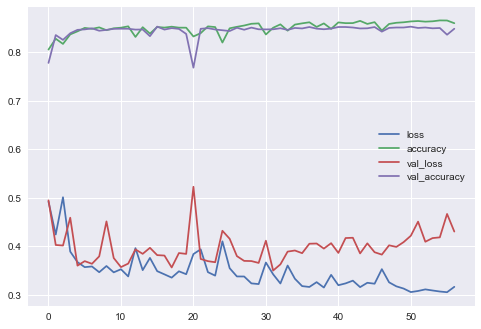

In [51]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

model.evaluate(x_test, y_test)

In [75]:
df2 = pd.read_csv('C:/Users/ncole/Downloads/adult.test')
first_row = df2.columns
columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education Years', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours per Week', 'Native Country', 'Income']
rename_dict_two = {}
for index, val in enumerate(columns):
    rename_dict_two[first_row[index]] = val
df2.rename(columns = rename_dict_two, inplace = True)
df2['Income'] = df2['Income'].apply(lambda x: 0 if '<=50K' in x else 1)
df2.shape

(16280, 15)

In [84]:

#Want to evaluate the trained deep learning model on the test data.
import numpy as np
final2 = df2.select_dtypes(include=np.number)

marital = pd.get_dummies(df2['Marital Status'], prefix = "Marriage_Status").iloc[:,1:]
race = pd.get_dummies(df2['Race'], prefix = 'race').iloc[:,1:]
sex = pd.get_dummies(df2['Sex'], prefix = 'sex').iloc[:, 1:]
occupation = pd.get_dummies(df2['Occupation'], prefix = 'job').iloc[:, 1:]
#country = pd.get_dummies(df['Native Country'], prefix = 'country').iloc[:, 1:]
#country.drop('country_?', axis = 1, inplace = True)
workclass = pd.get_dummies(df2['Workclass'], prefix = 'class').iloc[:, 1:]



final2 = pd.concat([final2, race, sex, marital, occupation, workclass], axis = 1)

final2.drop('fnlwgt', inplace = True, axis = 1)
final2.info()


#booleans = df2.applymap(lambda x: isinstance(x, (int, float)))
x_eval = final2.drop('Income',axis = 1)
scaler.fit(x_eval.values)
x_eval = scaler.transform(x_eval.values)
true_y = df2['Income'].values
true_y = np.array(true_y)
#predictions = model.predict(x_eval)
print(predictions)
print(true_y)
model.evaluate(
    x=x_eval, y=true_y, batch_size=None, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     16280 non-null  int64
 1   Education Years                         16280 non-null  int64
 2   Capital-gain                            16280 non-null  int64
 3   Capital-loss                            16280 non-null  int64
 4   Hours per Week                          16280 non-null  int64
 5   Income                                  16280 non-null  int64
 6   race_ Asian-Pac-Islander                16280 non-null  uint8
 7   race_ Black                             16280 non-null  uint8
 8   race_ Other                             16280 non-null  uint8
 9   race_ White                             16280 non-null  uint8
 10  sex_ Male                               16280 non-null  uint8
 11  Marriage_Status

[0.4245811998844147, 0.8485872149467468]

These results indicate that the model performs as well on the test data as we would have expected given the train data.